In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
#from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
#wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
#X = wine.data.features 
#y = wine.data.targets 
  
# metadata 
#print(wine.metadata) 
  
# variable information 
#print(wine.variables)

In [4]:
url = "https://archive.ics.uci.edu/static/public/109/data.csv"
column_names = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline", "Class"]

In [5]:
df = pd.read_csv(url, names=column_names)


In [6]:
df = df.iloc[1:].reset_index(drop=True)

In [7]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA()

In [12]:
X_pca = pca.fit_transform(X_scaled)

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

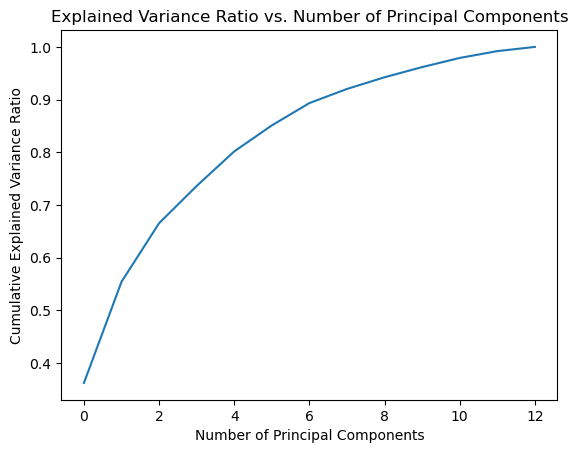

In [14]:
plt.plot(cumulative_variance_ratio)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Principal Components")
plt.show()

In [15]:
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

In [16]:
optimal_components

10

In [17]:
pca = PCA(n_components=optimal_components)

In [18]:
X_pca = pca.fit_transform(X_scaled)

/tmp/ipykernel_740/2448825634.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c='y', cmap='viridis', edgecolor='k')


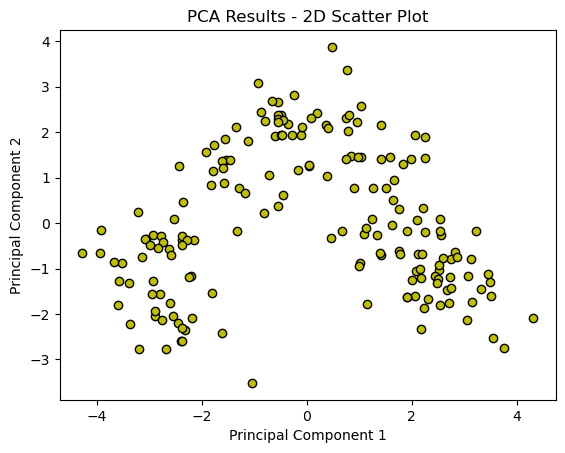

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='y', cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results - 2D Scatter Plot")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
clusters = kmeans.fit_predict(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Interpret the results of PCA and clustering analysis
df['Cluster'] = clusters
cluster_counts = df.groupby('Cluster')['Class'].value_counts().unstack()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Class       1     2     3
Cluster                  
0        59.0   3.0   NaN
1         NaN   3.0  48.0
2         NaN  65.0   NaN
